In [3]:
import numpy as np,pandas as pd, matplotlib.pyplot as plt, seaborn as sns,statistics,scipy.stats as st,warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import *

In [8]:
df=pd.read_csv('Cricket.csv',encoding='latin1')   #use encoding to avoid UnicodeDecodeError
df.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  
0  21367  86.23   49  96  20  
1  18048  78.86   25  93  15  
2  17046  80.39   30  82  20  
3  14725  91.20   28  68  34  
4  16020  78.96   19  77  28

In [9]:
df.shape

(79, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [11]:
df[['Start','End']]=df.Span.str.split('-',expand=True)
df.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0 Start   End  
0  21367  86.23   49  96  20  1989  2012  
1  18048  78.86   25  93  15  2000  2015  
2  17046  80.39   30  82  20  1995  2012  
3  14725  91.20   28  68  34  1989  2011  
4  16020  78.96   19  77  28  1998  2015

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [13]:
df[['Start','End']]=df[['Start','End']].astype(int)
df['Exp']=df['End']-df['Start']
df.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  Start   End  Exp  
0  21367  86.23   49  96  20   1989  2012   23  
1  18048  78.86   25  93  15   2000  2015   15  
2  17046  80.39   30  82  20   1995  2012   17  
3  14725  91.20   28  68  34   1989  2011   22  
4  16020  78.96   19  77  28   1998  2015   17

In [15]:
df=df.drop(['Start','End','Span'],axis=1)
df.head()

Player  Mat  Inns  NO   Runs    HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200*  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234   169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704   164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430   189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650   144  33.37  16020   

      SR  100  50   0  Exp  
0  86.23   49  96  20   23  
1  78.86   25  93  15   15  
2  80.39   30  82  20   17  
3  91.20   28  68  34   22  
4  78.96   19  77  28   17

In [19]:
df2=df['HS']
df2.to_string()

'0     200*\n1      169\n2      164\n3      189\n4      144\n5     137*\n6      139\n7      183\n8      153\n9      169\n10    161*\n11    141*\n12     172\n13    183*\n14    153*\n15    162*\n16     145\n17     215\n18     194\n19     150\n20     150\n21    152*\n22    132*\n23     173\n24     219\n25     183\n26     175\n27     124\n28    134*\n29     130\n30    120*\n31    131*\n32    119*\n33     144\n34     159\n35     102\n36    145*\n37     141\n38    108*\n39    188*\n40     145\n41     143\n42    189*\n43    142*\n44    139*\n45    127*\n46    131*\n47     122\n48    174*\n49    181*\n50     166\n51     145\n52     122\n53     121\n54    140*\n55    119*\n56    120*\n57    124*\n58    113*\n59    185*\n60     154\n61    116*\n62     112\n63    237*\n64    109*\n65     264\n66     141\n67     119\n68    144*\n69    145*\n70    150*\n71    131*\n72    133*\n73    119*\n74    133*\n75     96*\n76    120*\n77     156\n78     112'

In [20]:
df[['HS','Extra']]=df.HS.str.split('*',expand=True)
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Exp Extra  
0  86.23   49  96  20   23        
1  78.86   25  93  15   15  None  
2  80.39   30  82  20   17  None  
3  91.20   28  68  34   22  None  
4  78.96   19  77  28   17  None

In [21]:
df=df.drop(['Extra'],axis=1)
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Exp  
0  86.23   49  96  20   23  
1  78.86   25  93  15   15  
2  80.39   30  82  20   17  
3  91.20   28  68  34   22  
4  78.96   19  77  28   17

In [22]:
df['HS']=df['HS'].astype(int)
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Exp  
0  86.23   49  96  20   23  
1  78.86   25  93  15   15  
2  80.39   30  82  20   17  
3  91.20   28  68  34   22  
4  78.96   19  77  28   17

In [25]:
df.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
Exp       0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
plt.figure(figsize=(30,5))

mat=df[['Player','Mat']]
mat

Player  Mat
0          SR Tendulkar (INDIA)  463
1   KC Sangakkara (Asia/ICC/SL)  404
2          RT Ponting (AUS/ICC)  375
3       ST Jayasuriya (Asia/SL)  445
4    DPMD Jayawardene (Asia/SL)  448
..                          ...  ...
74            CG Greenidge (WI)  128
75          Misbah-ul-Haq (PAK)  162
76         PD Collingwood (ENG)  197
77              A Symonds (AUS)  198
78      Abdul Razzaq (Asia/PAK)  265

[79 rows x 2 columns]

<Figure size 3000x500 with 0 Axes>

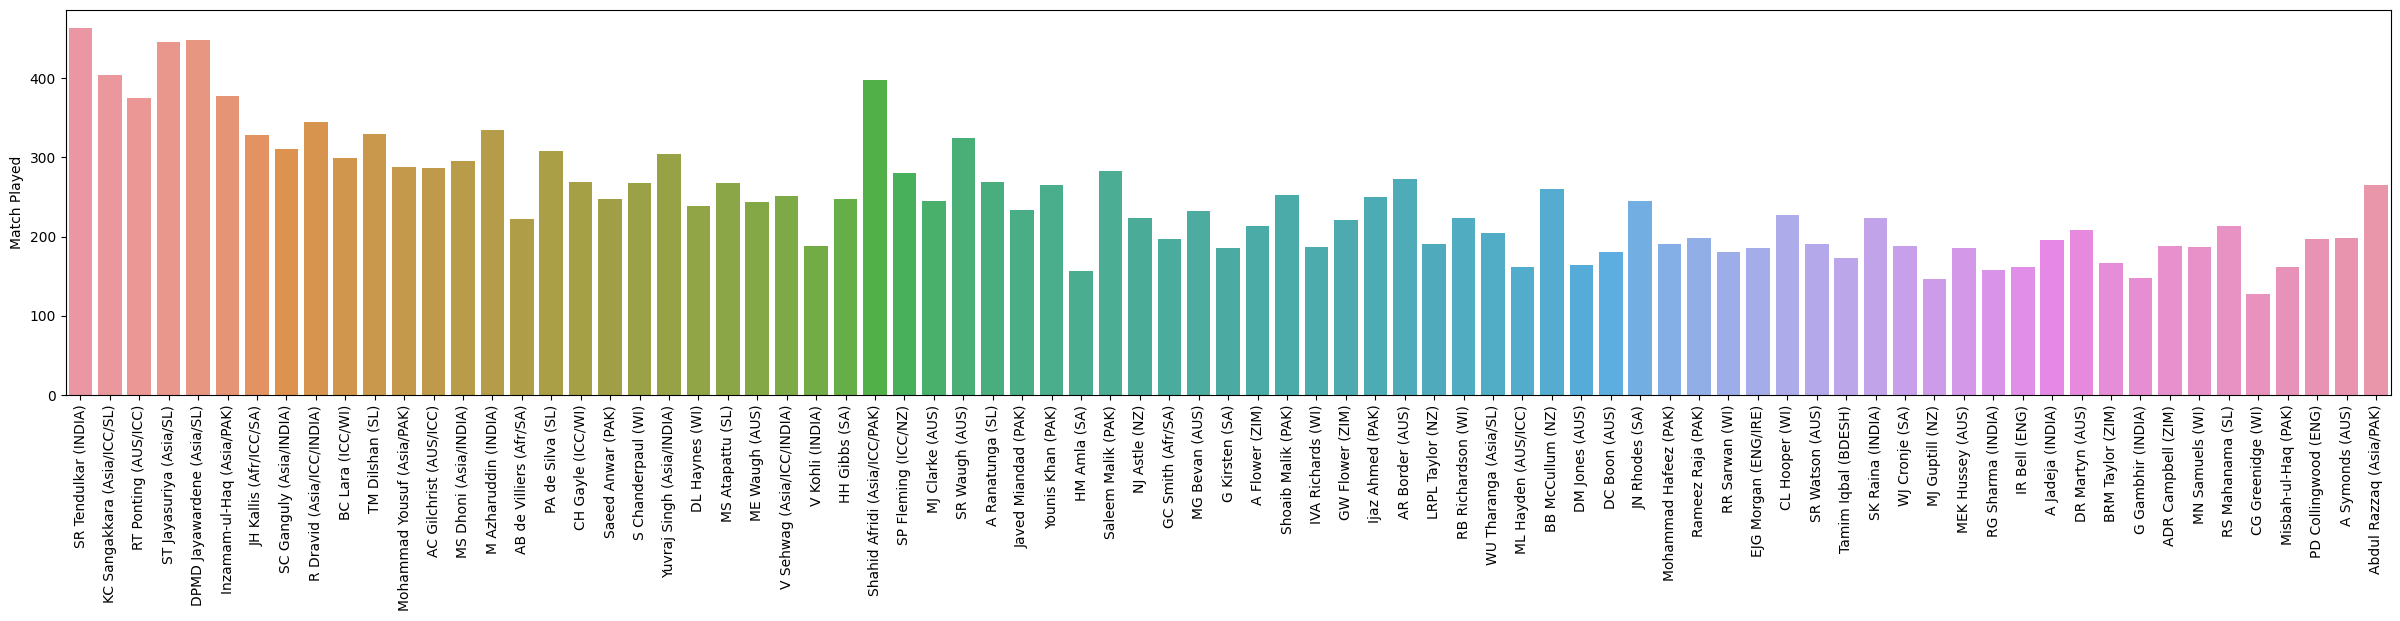

In [33]:
plt.figure(figsize=(30,5))
ax=sns.barplot(x='Player',y='Mat',data=df)
ax.set(xlabel='',ylabel='Match Played')
plt.xticks(rotation=90)
plt.show()

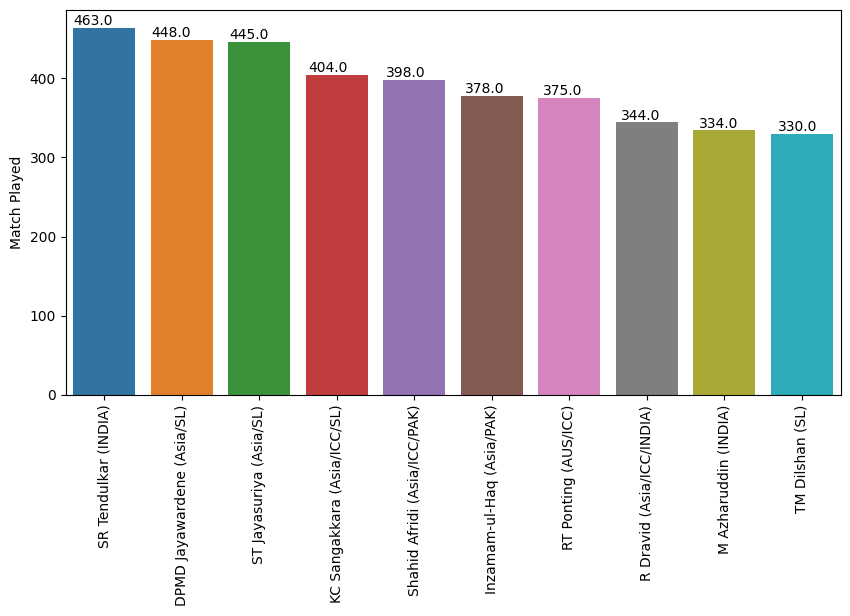

In [42]:
plt.figure(figsize=(10,5))
mat_top10=df[['Player','Mat']].sort_values('Mat',ascending=False).head(10)
ax=sns.barplot(x='Player',y='Mat',data=mat_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()*1.01,p.get_height()*1.01))
ax.set(xlabel='',ylabel='Match Played')
plt.xticks(rotation=90)
plt.show()

In [44]:
col=df.columns
col

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
       '50', '0', 'Exp'],
      dtype='object')

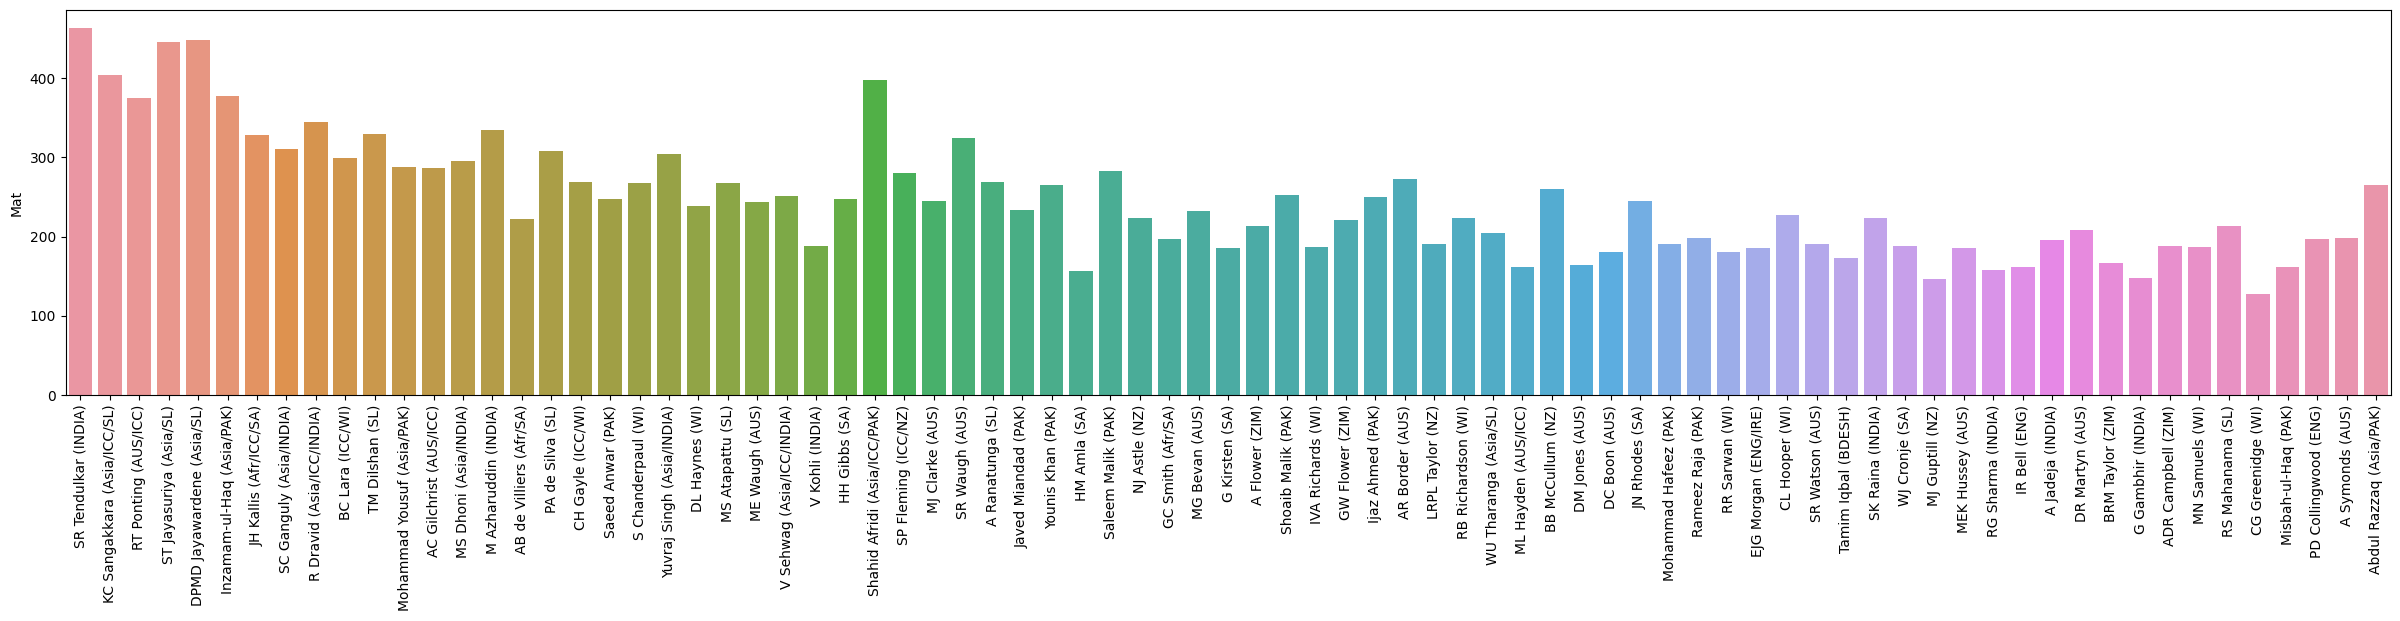

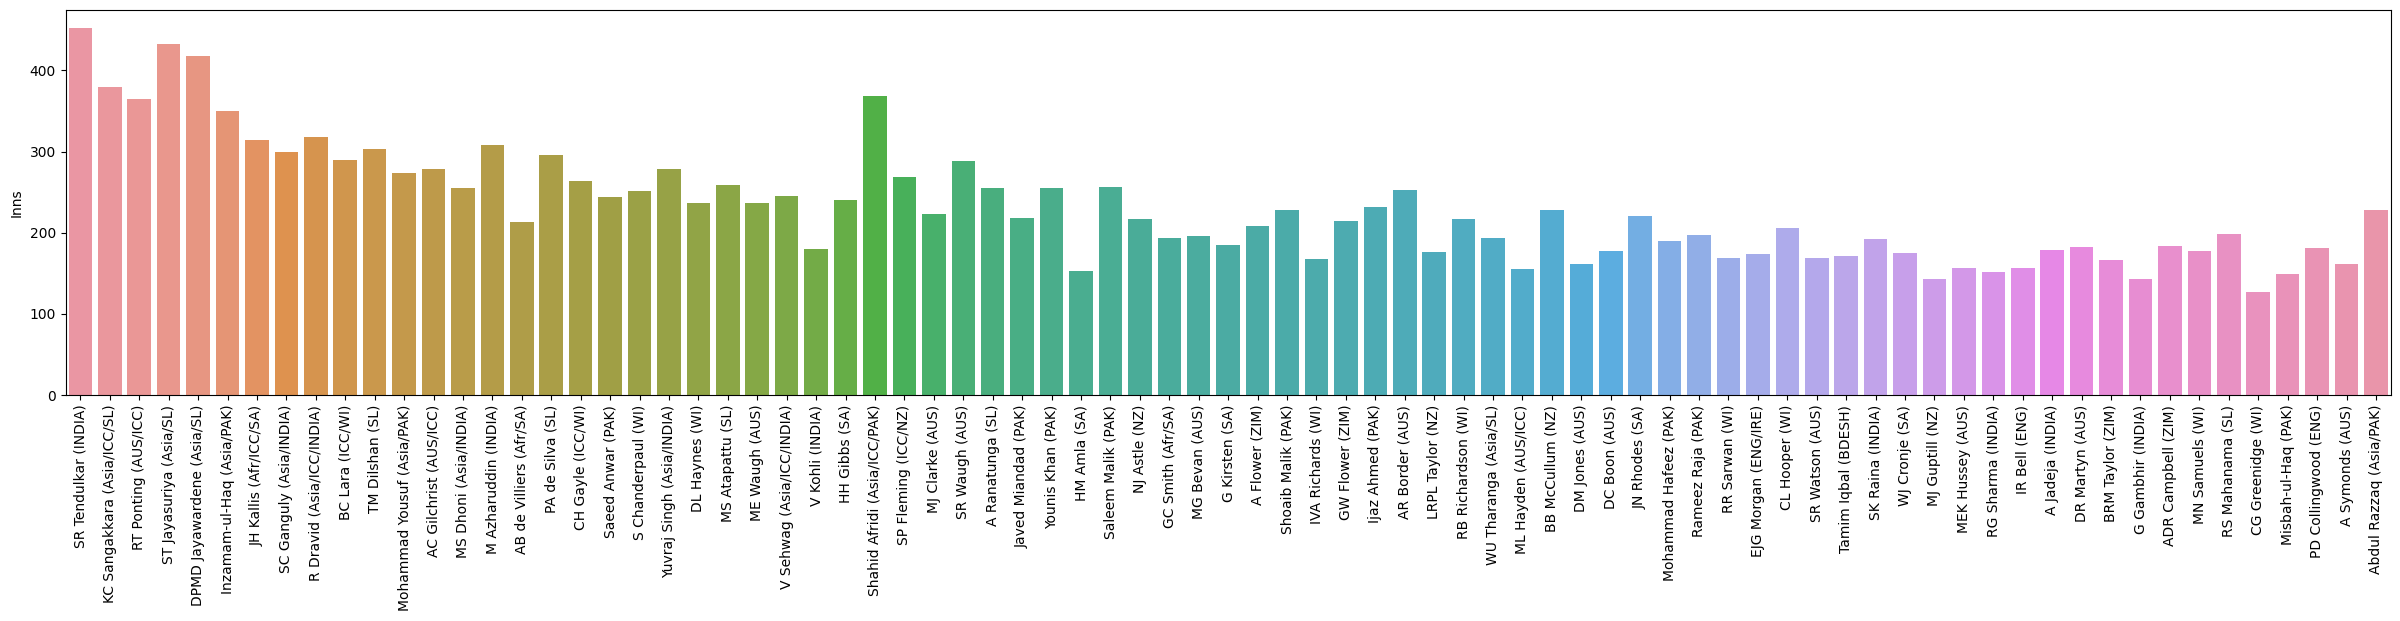

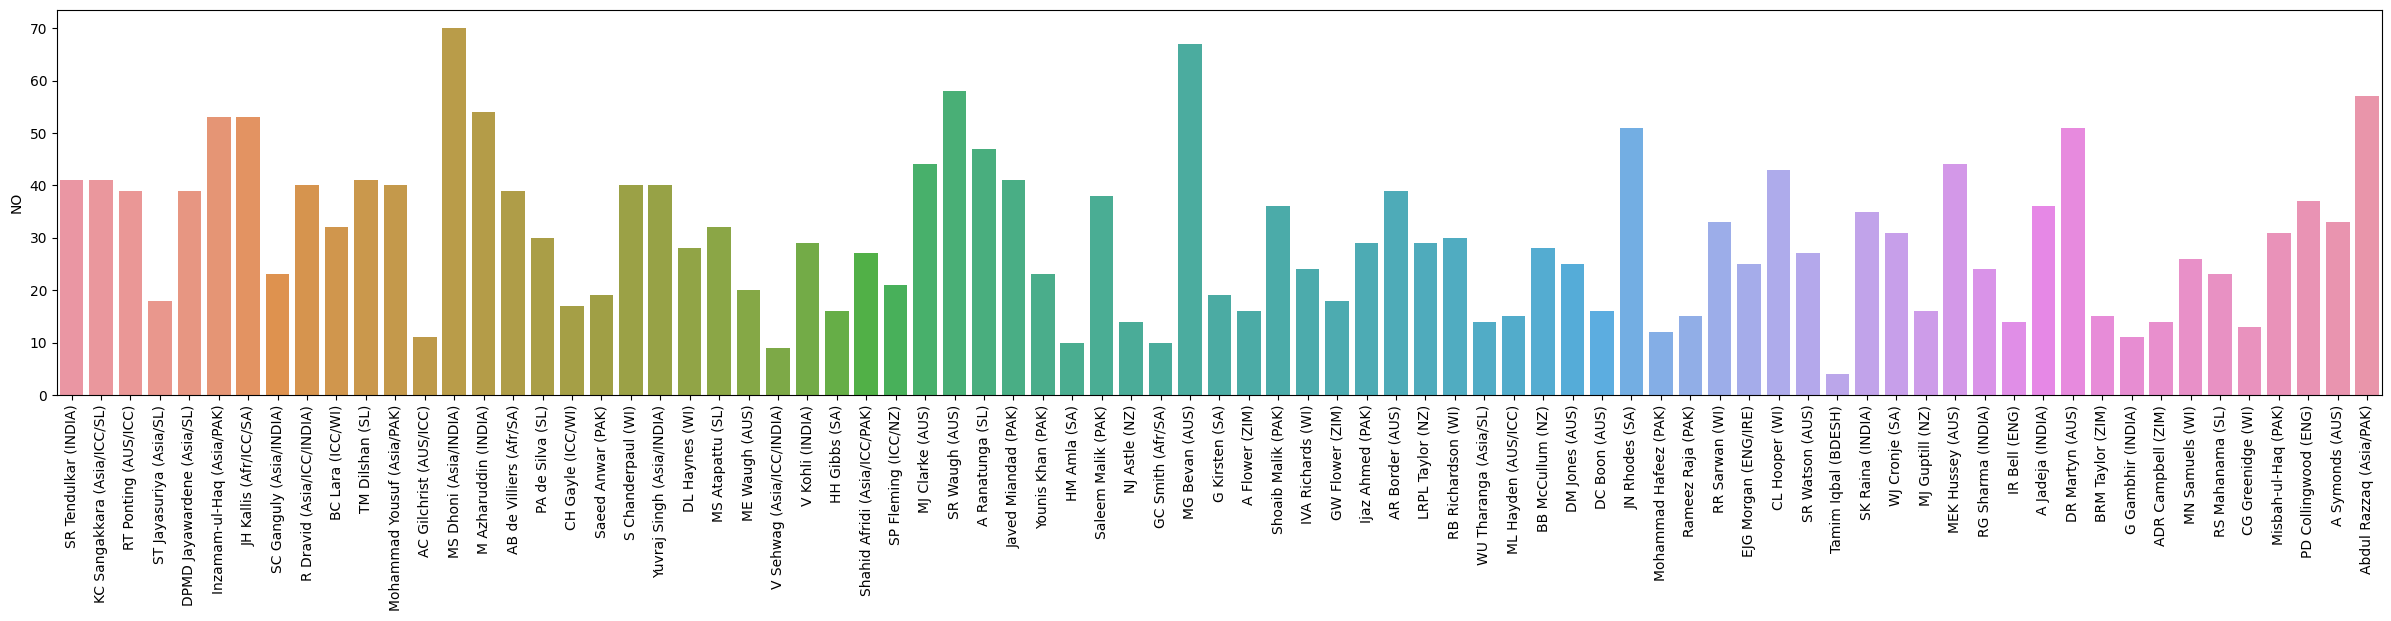

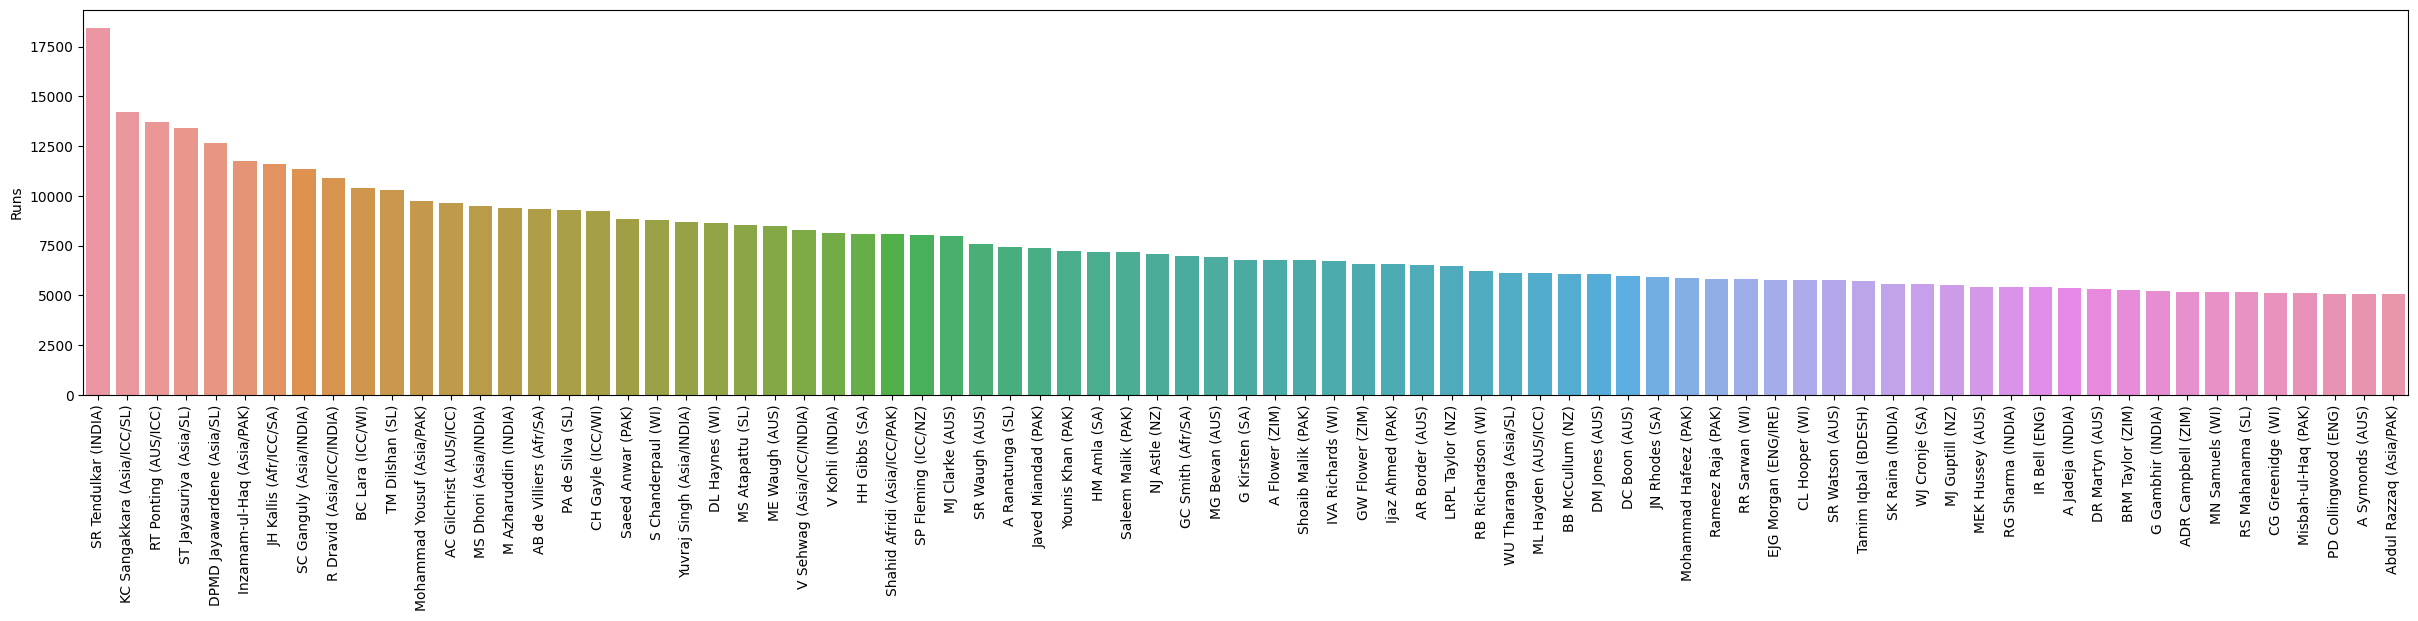

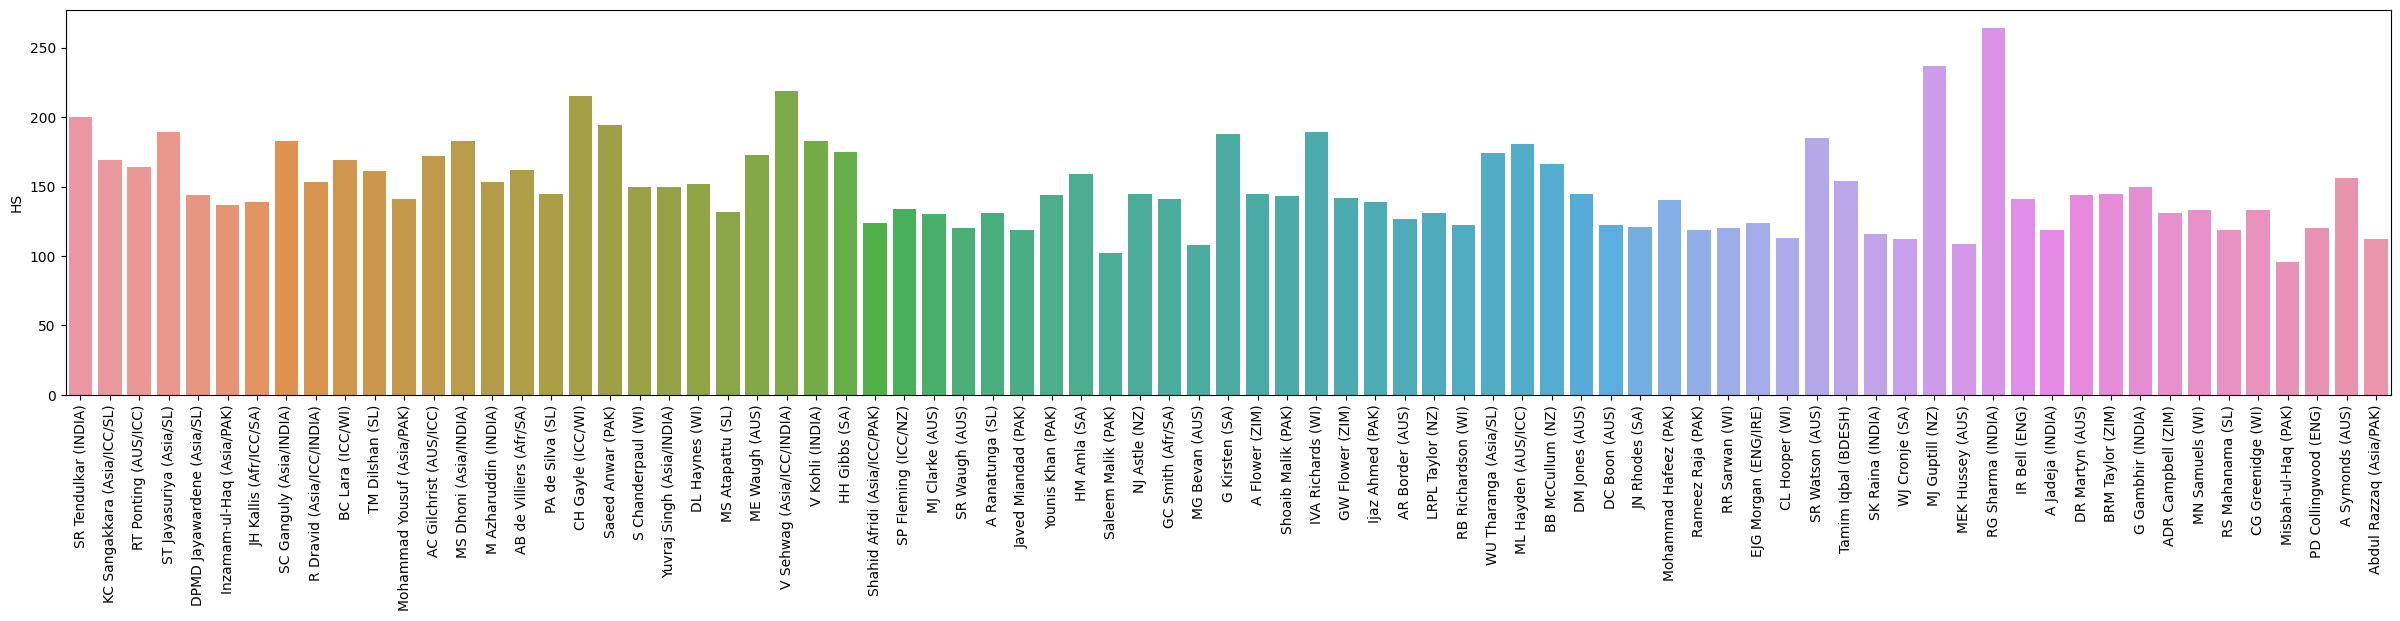

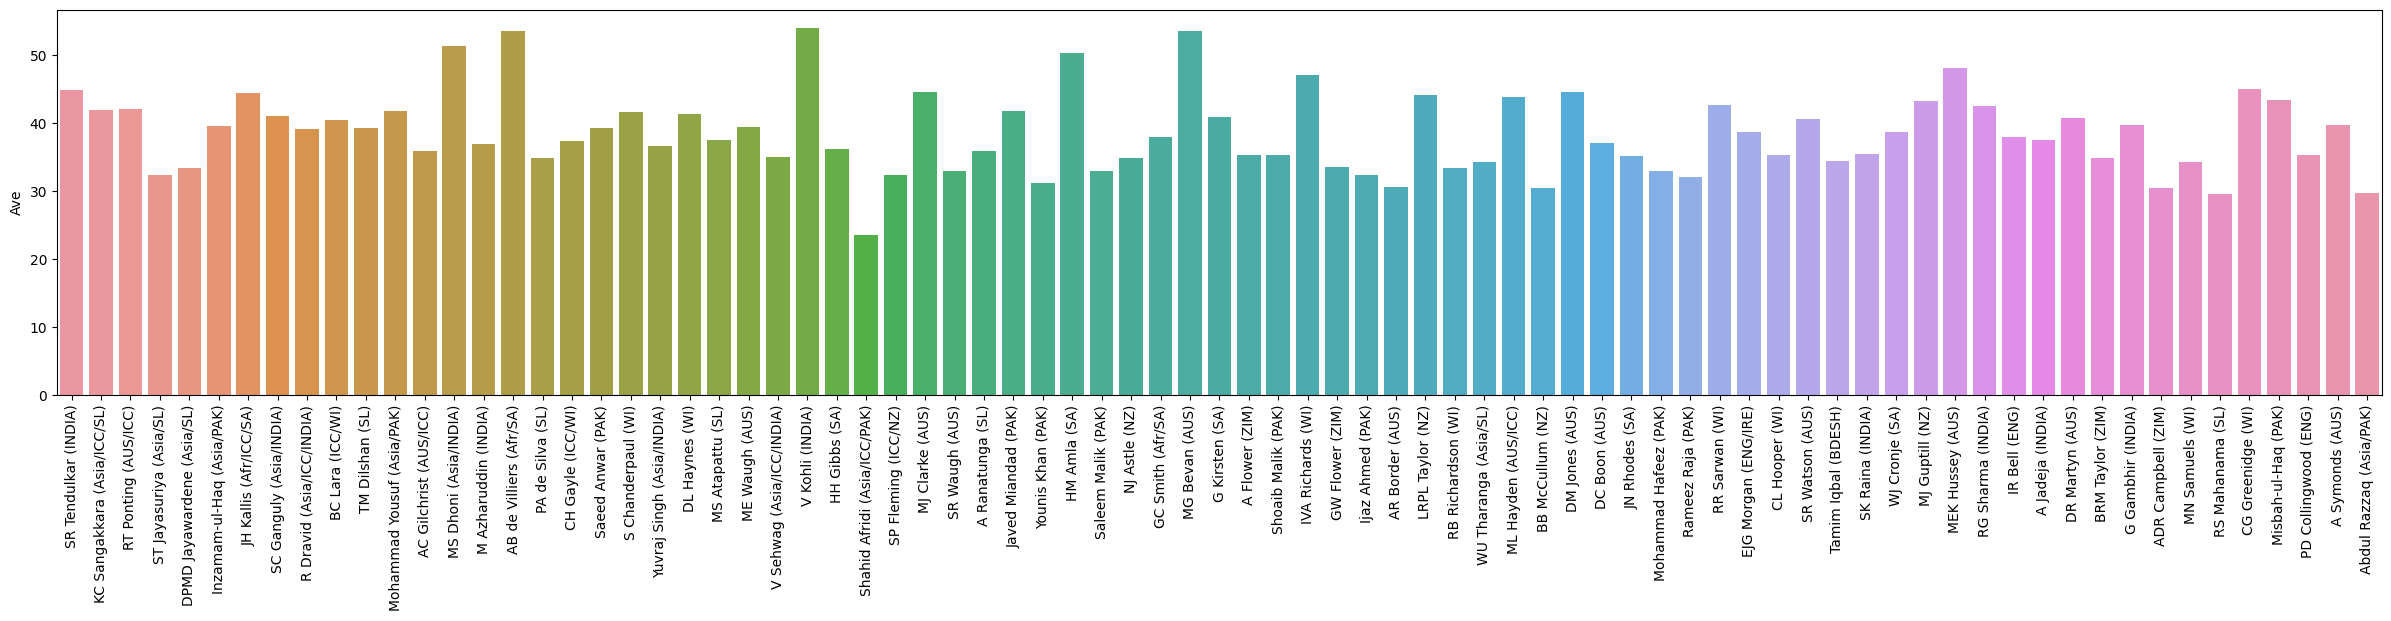

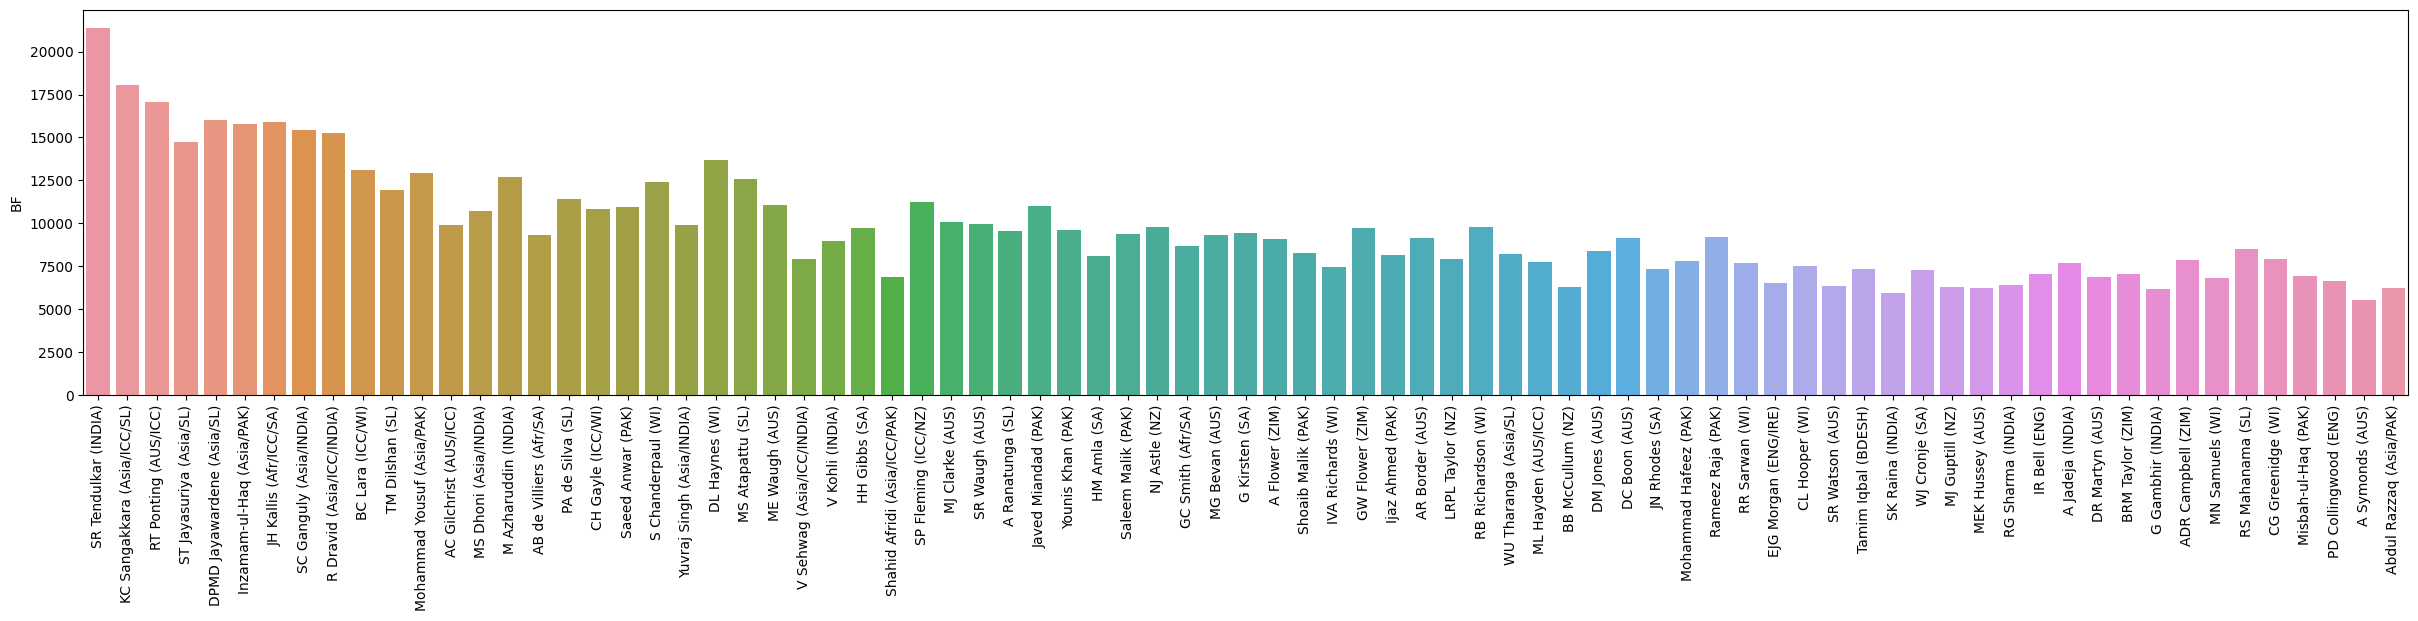

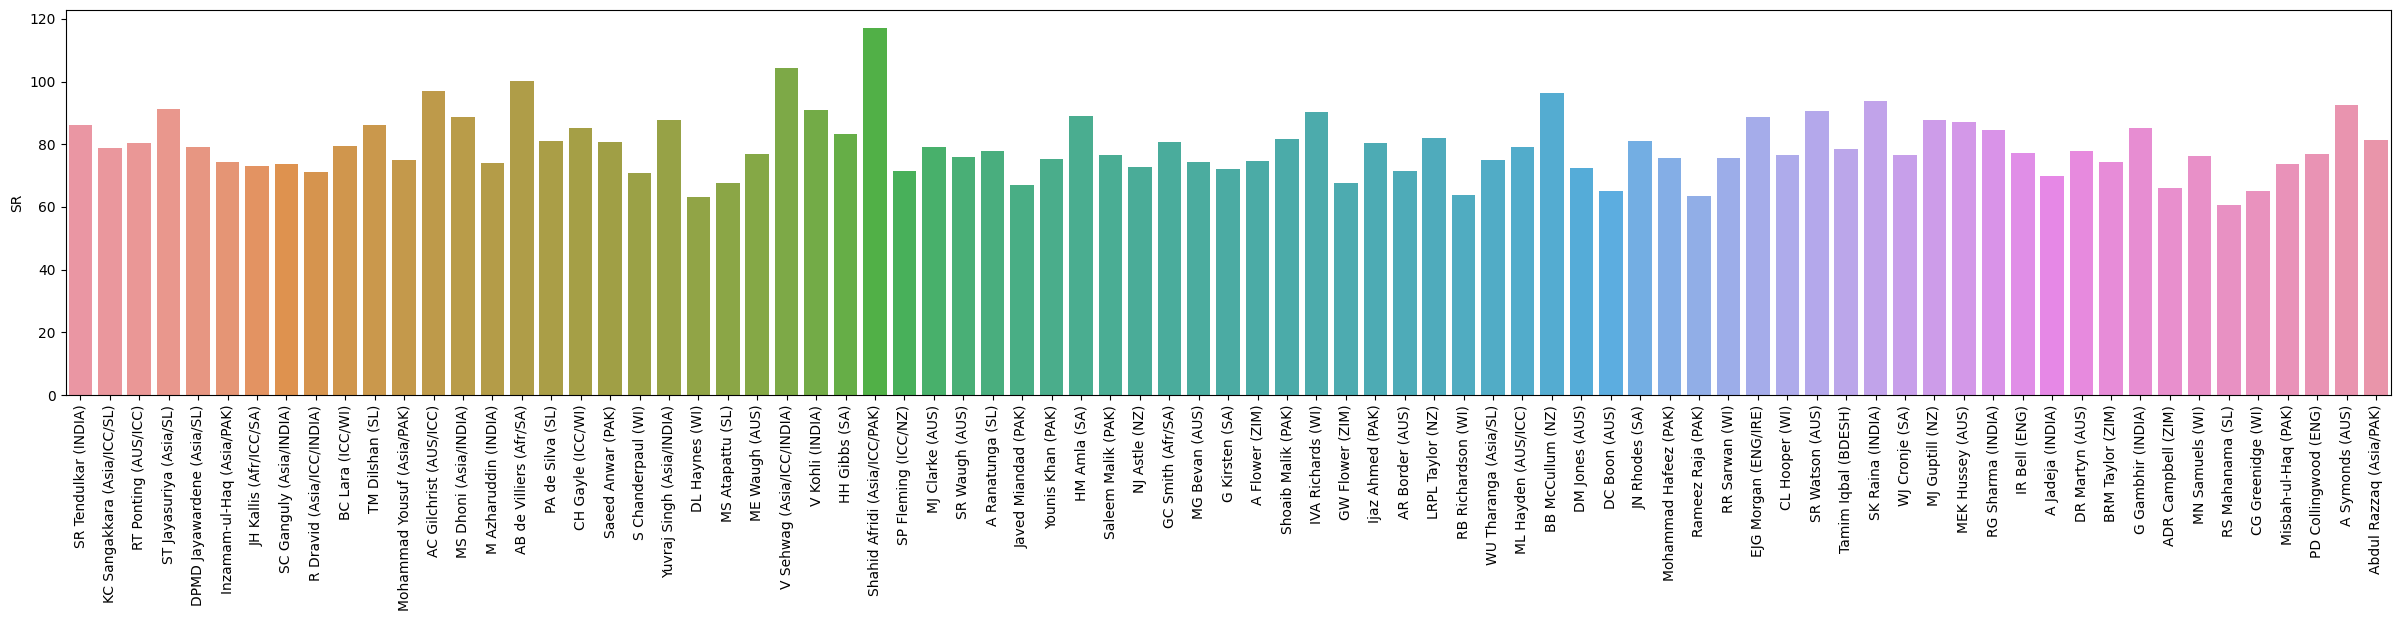

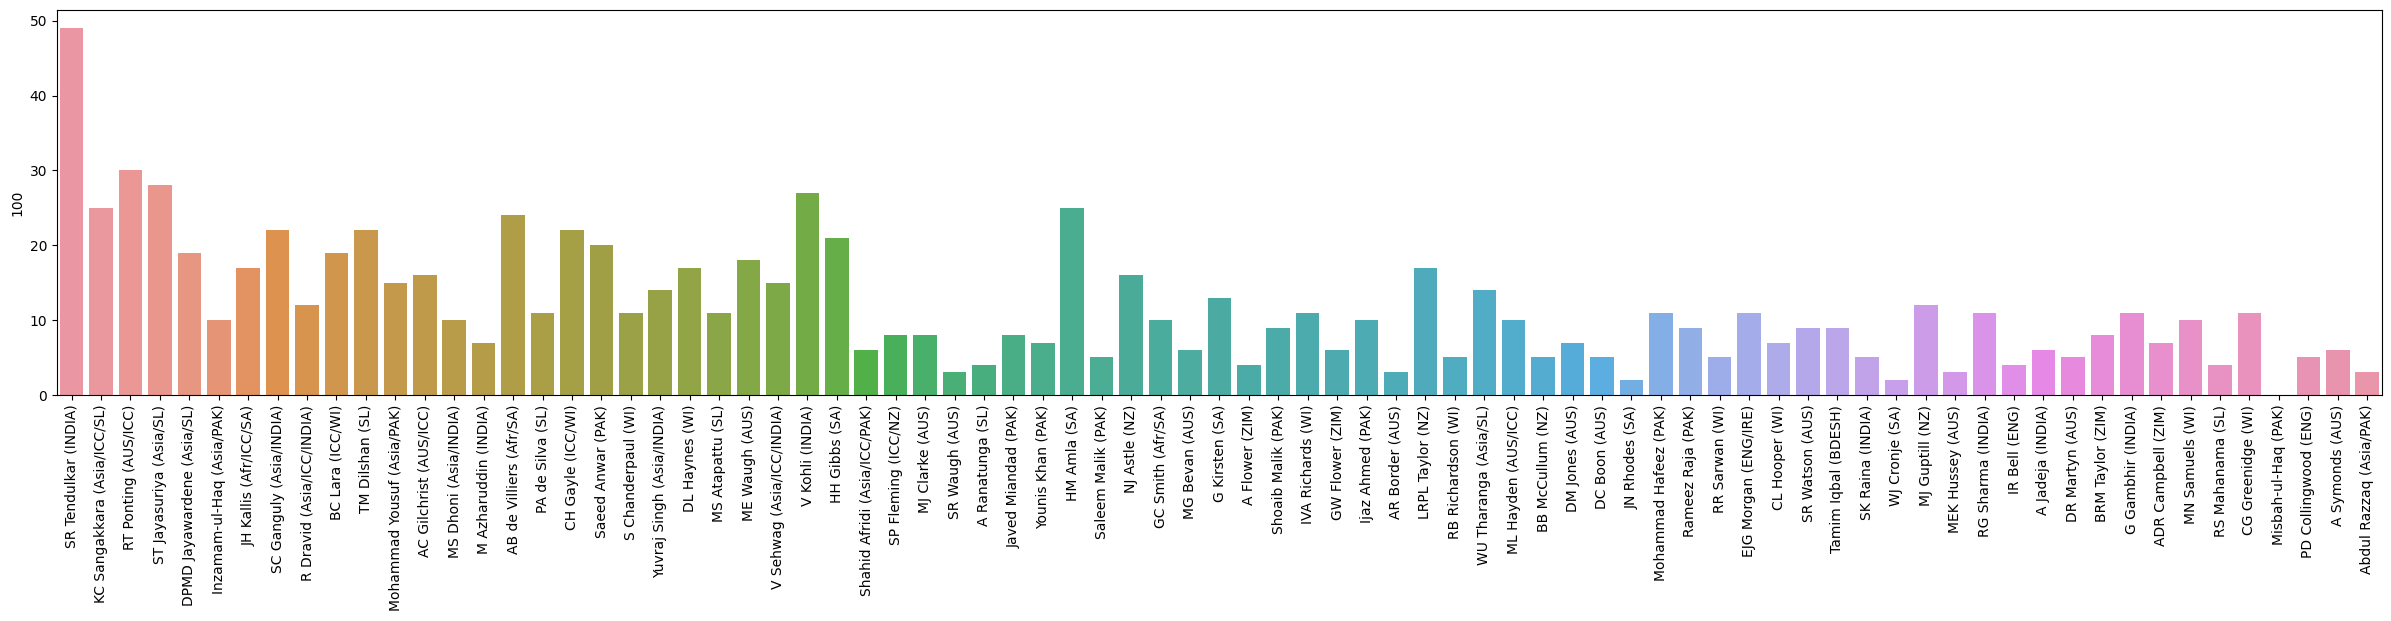

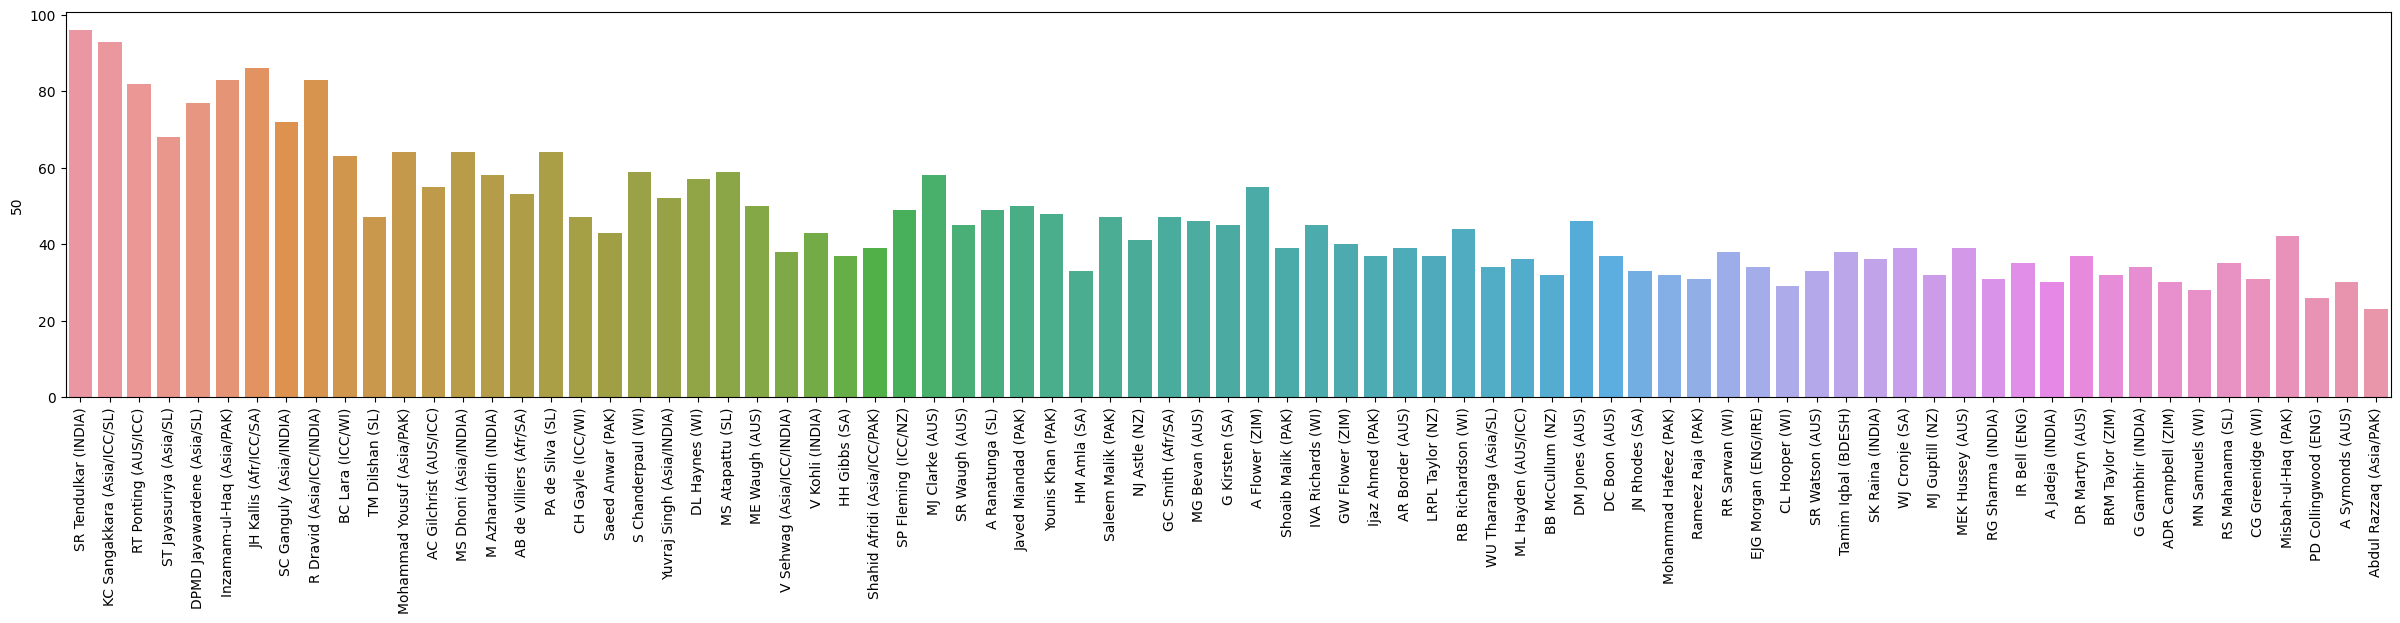

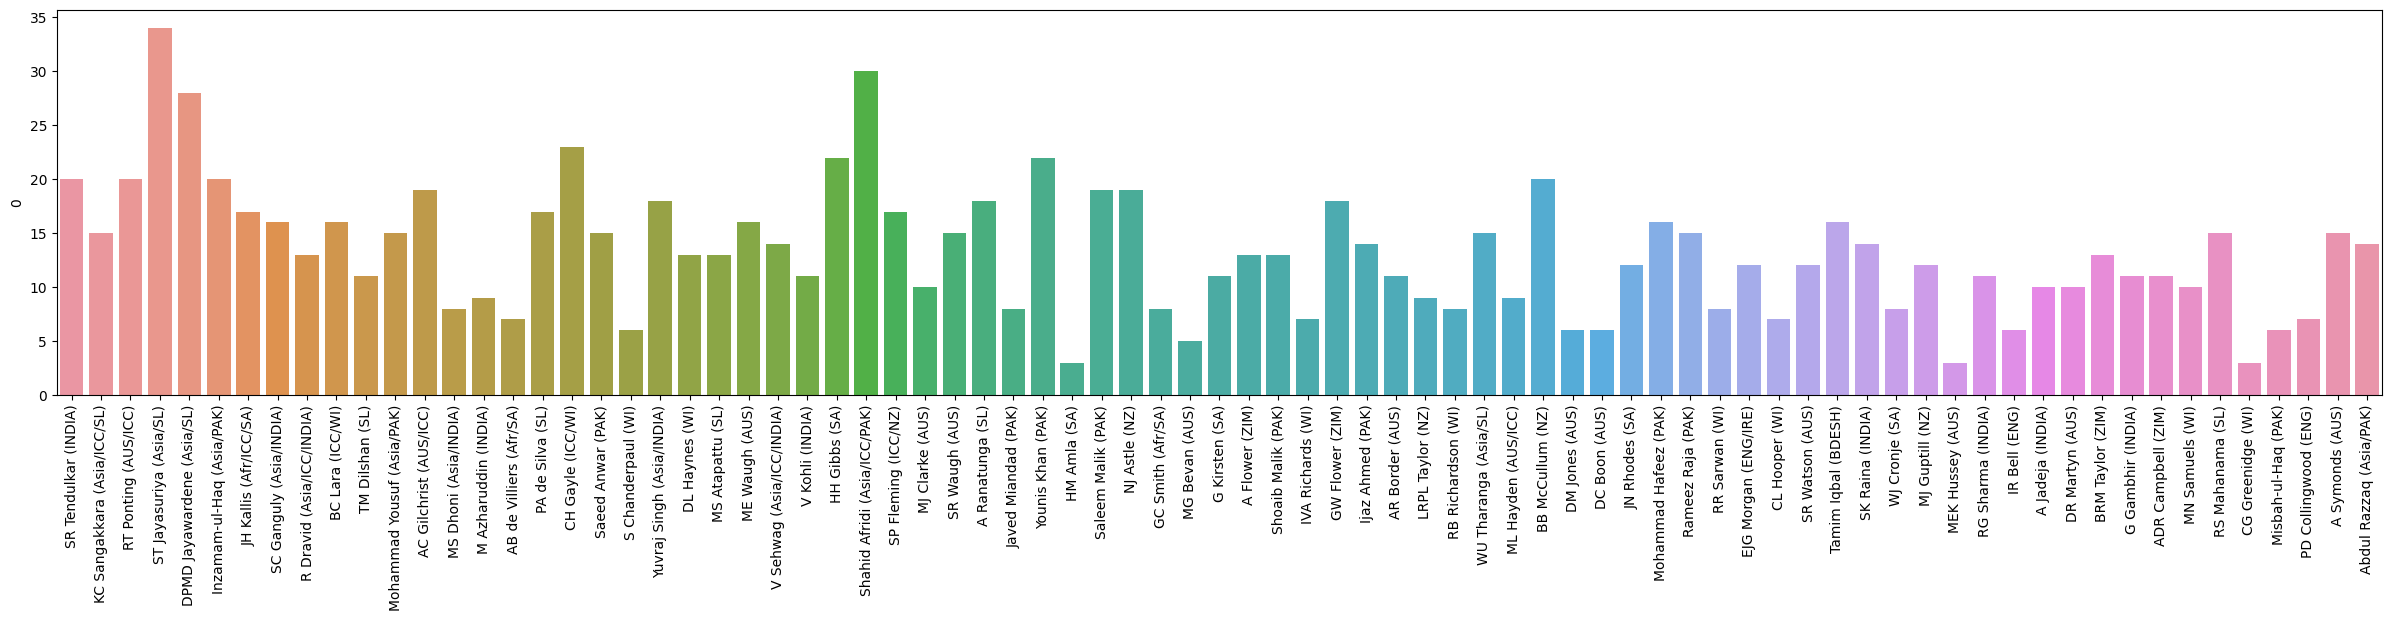

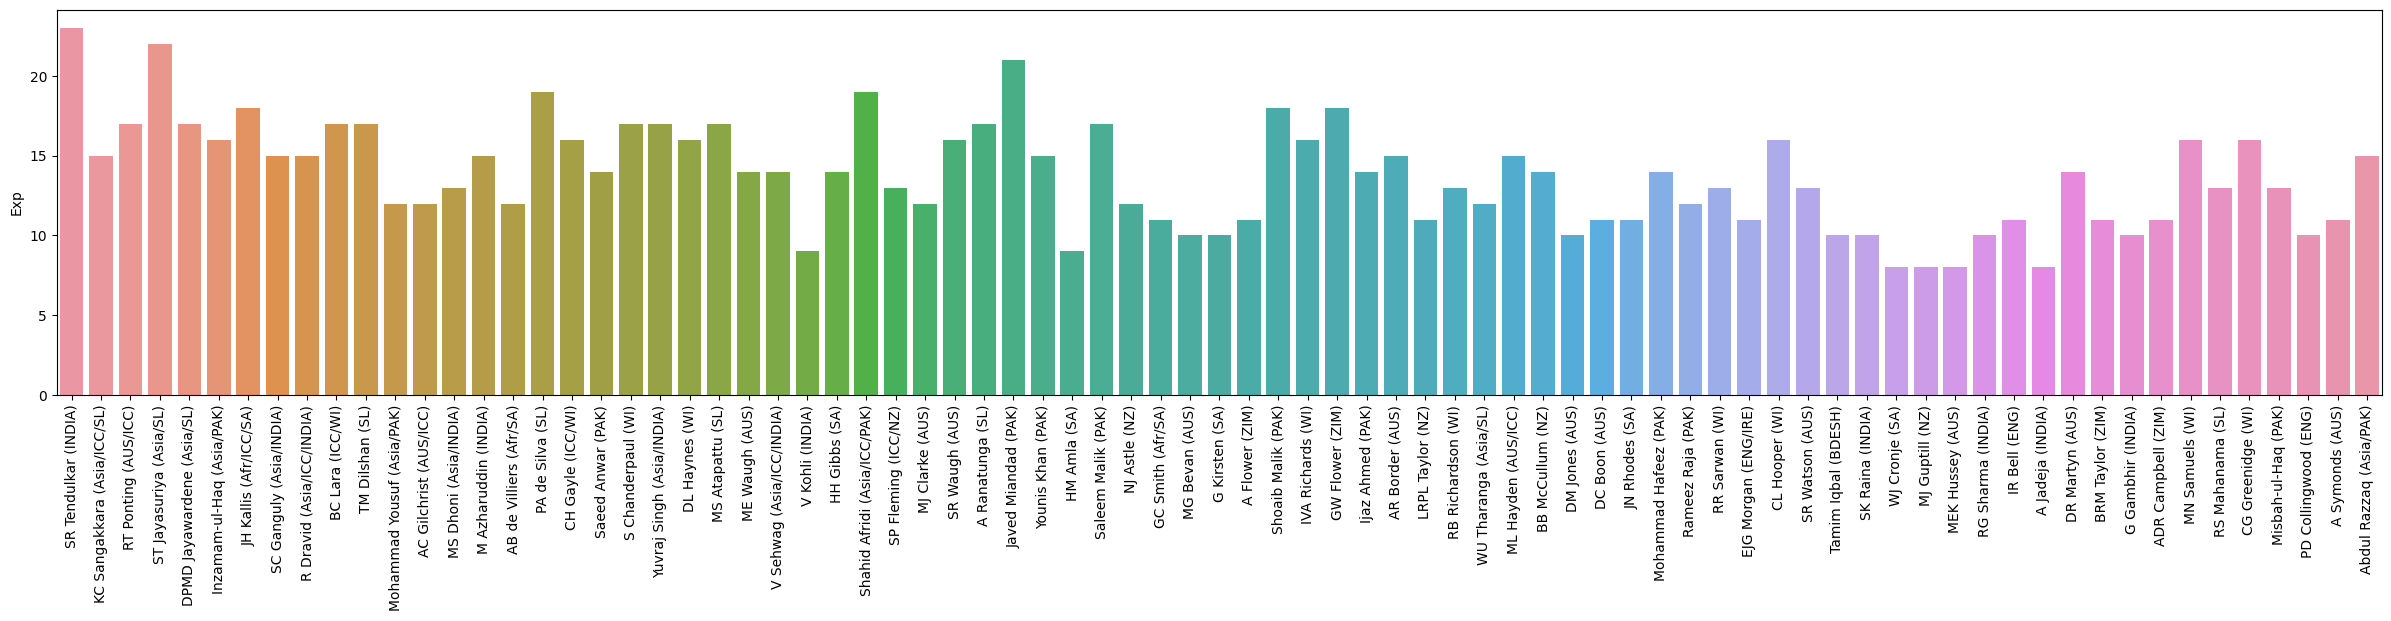

In [45]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.figure(figsize = (30,5))
        bf = df[['Player',col_name]]
        ax = sns.barplot(x='Player', y=col_name, data= bf)
        ax.set(xlabel = '', ylabel= col_name)
        plt.xticks(rotation=90)
        plt.show()

Getting top 10 players according to Mat played


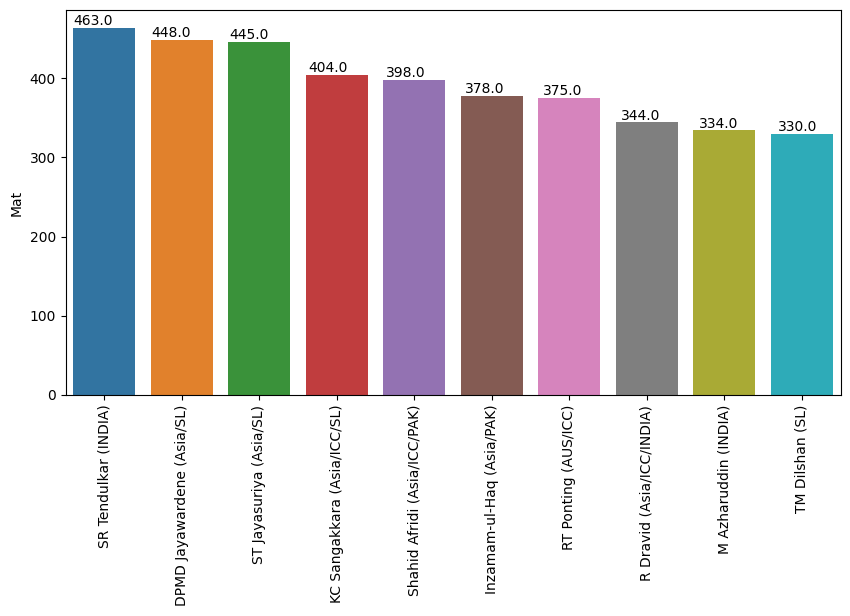

Getting top 10 players according to Inns played


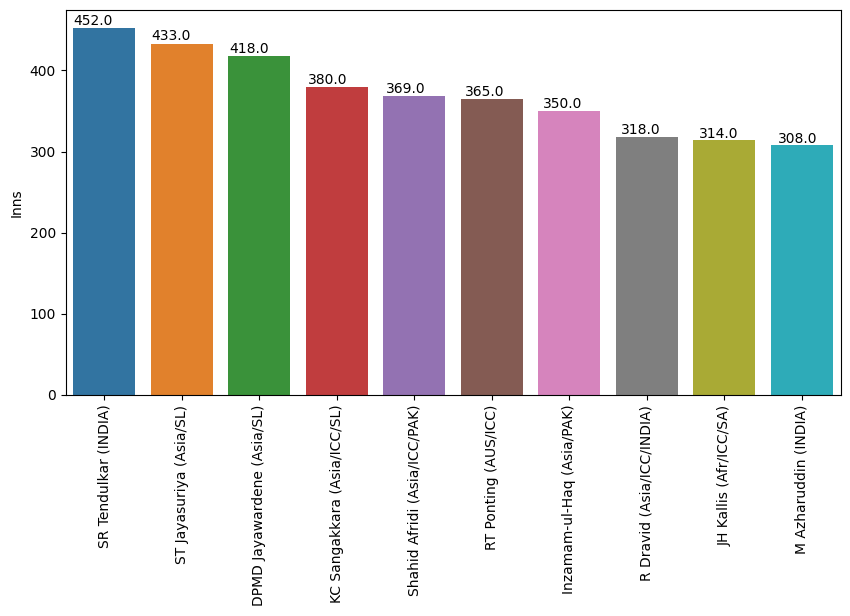

Getting top 10 players according to NO played


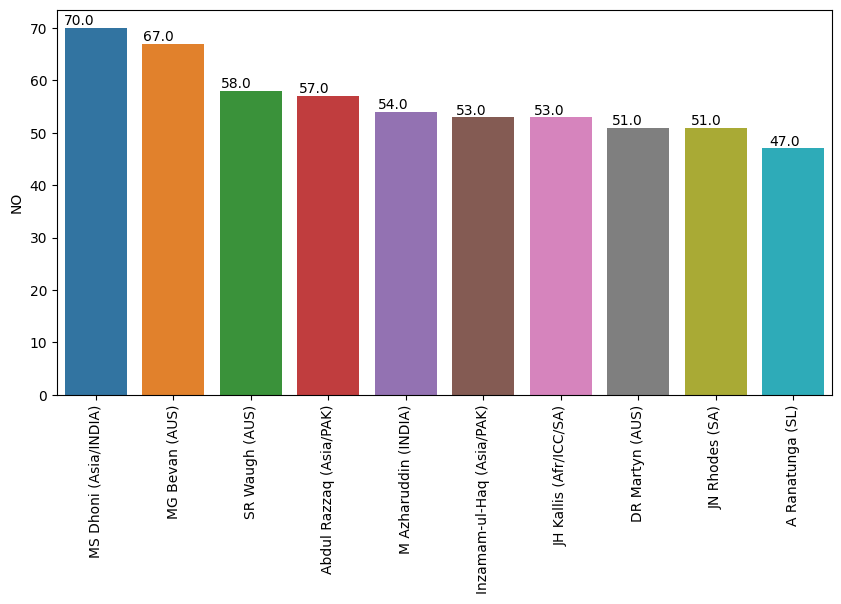

Getting top 10 players according to Runs played


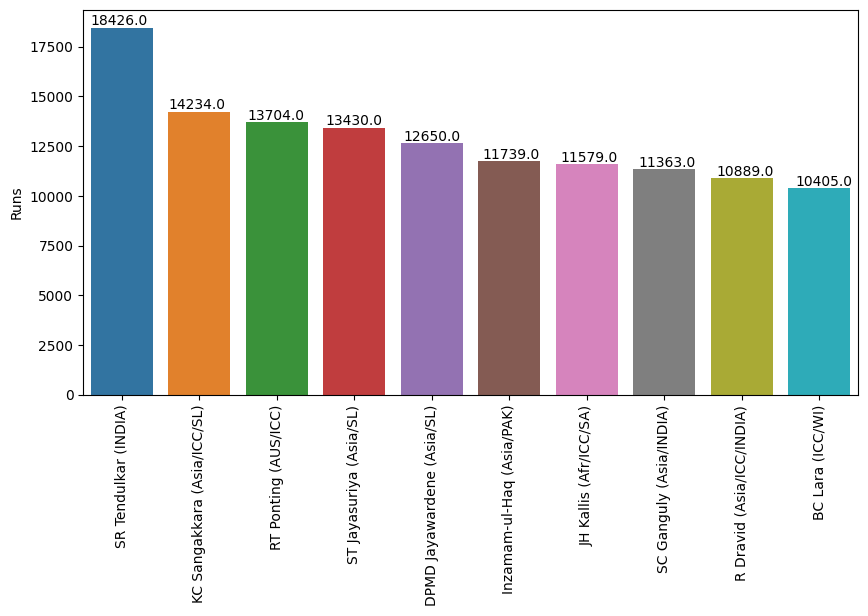

Getting top 10 players according to HS played


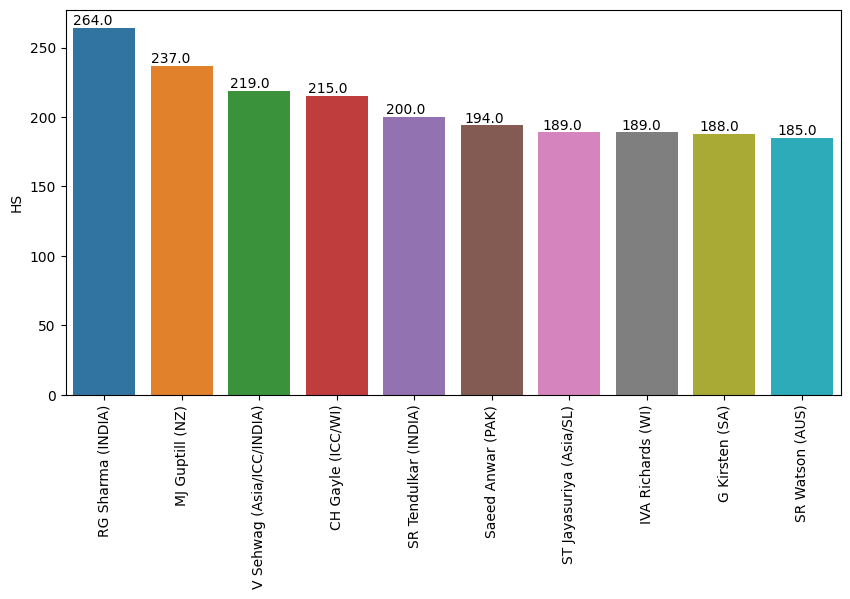

Getting top 10 players according to Ave played


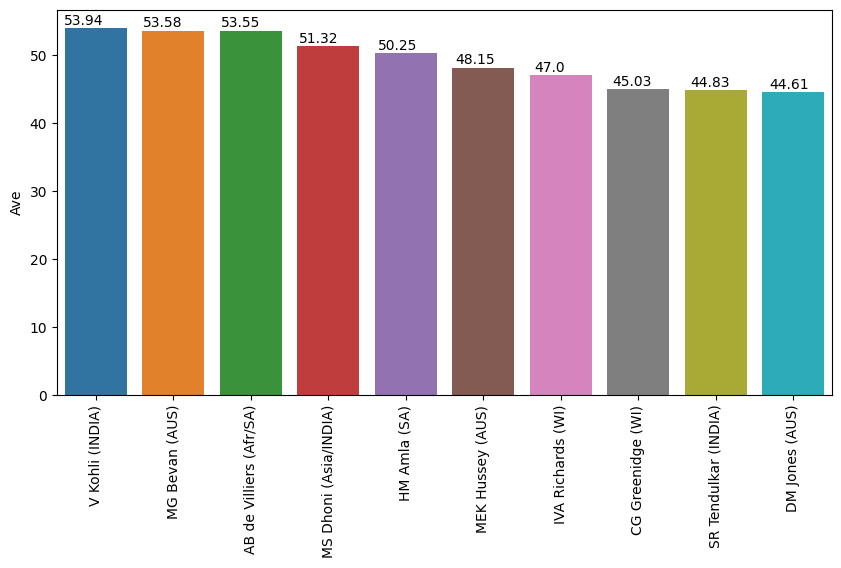

Getting top 10 players according to BF played


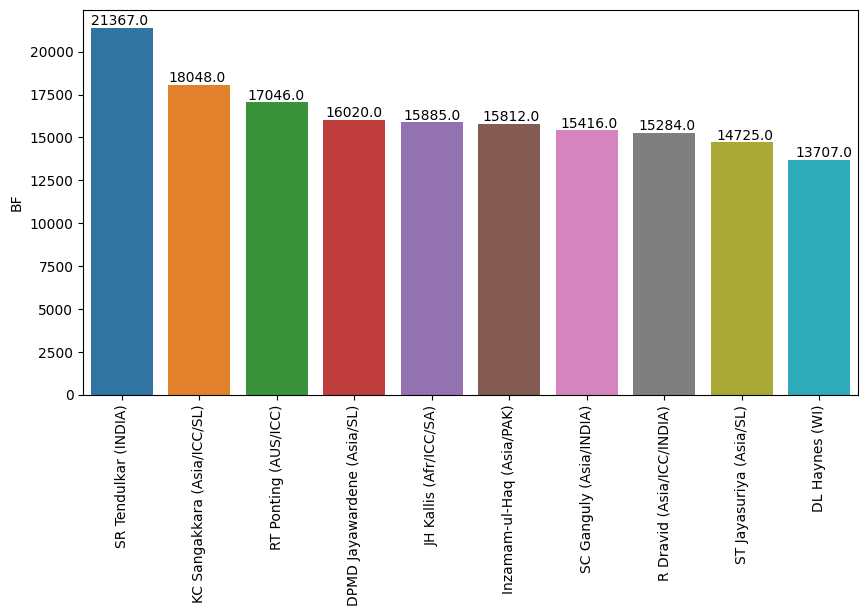

Getting top 10 players according to SR played


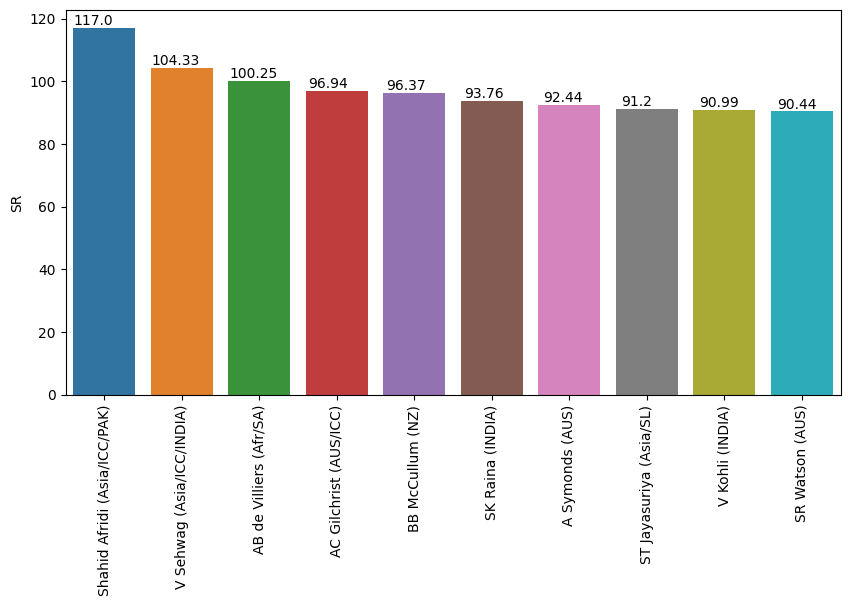

Getting top 10 players according to 100 played


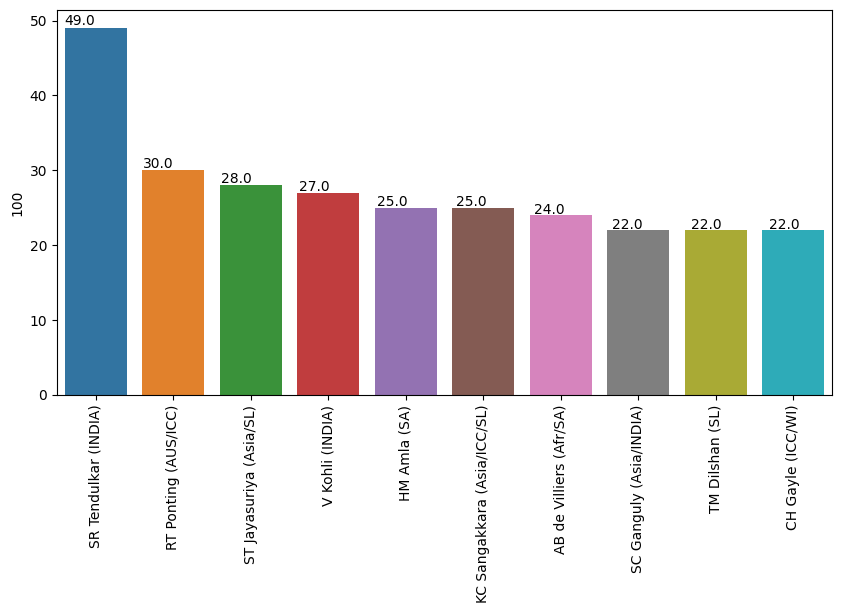

Getting top 10 players according to 50 played


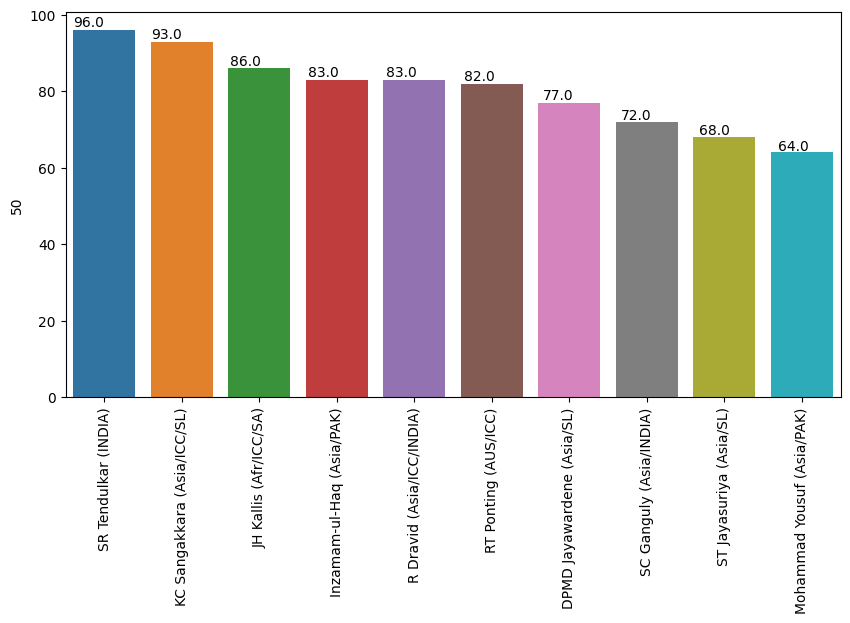

Getting top 10 players according to 0 played


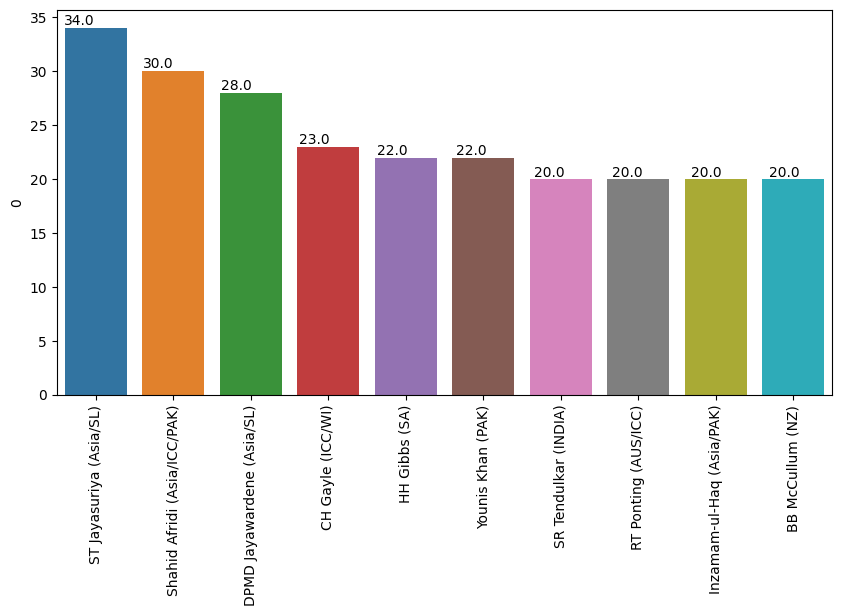

Getting top 10 players according to Exp played


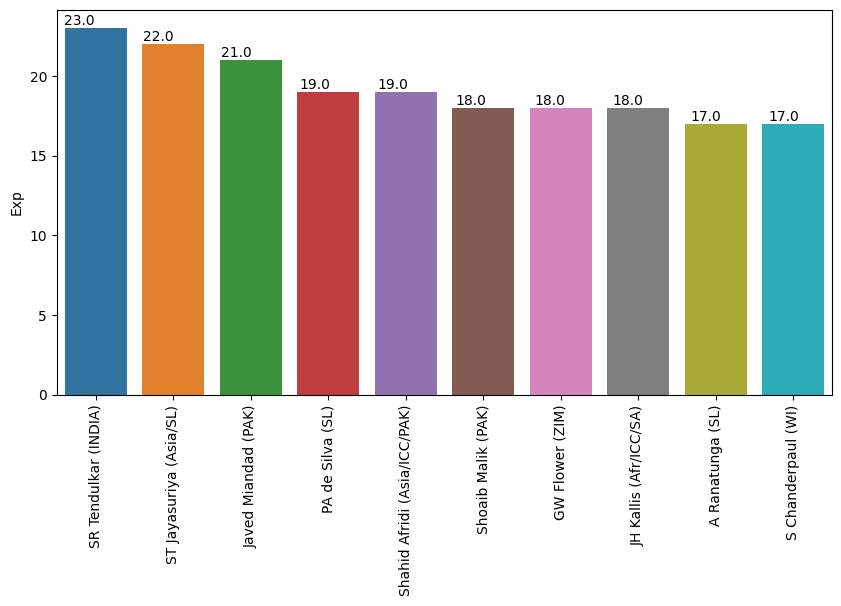

In [46]:
for col_name in col:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.figure(figsize = (10,5))
        print("Getting top 10 players according to {col_name} played".format(col_name = col_name))
        bf_top10 = df[['Player',col_name]].sort_values(col_name, ascending = False).head(10)
        ax = sns.barplot(x='Player', y=col_name, data= bf_top10)
        for p in ax.patches:
           ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
        ax.set(xlabel = '', ylabel= col_name)
        plt.xticks(rotation=90)
        plt.show()

##Outlier Detection

In [47]:
df.describe()

Mat        Inns         NO          Runs          HS        Ave  \
count   79.000000   79.000000  79.000000     79.000000   79.000000  79.000000   
mean   245.075949  230.544304  30.037975   7618.139241  149.253165  38.523291   
std     74.211716   70.321022  14.421710   2551.873313   31.285070   5.919093   
min    128.000000  127.000000   4.000000   5080.000000   96.000000  23.570000   
25%    188.000000  177.000000  17.500000   5759.000000  125.500000  34.600000   
50%    232.000000  217.000000  29.000000   6798.000000  144.000000  37.870000   
75%    281.500000  261.500000  40.000000   8739.500000  167.500000  41.845000   
max    463.000000  452.000000  70.000000  18426.000000  264.000000  53.940000   

                 BF          SR        100         50          0        Exp  
count     79.000000   79.000000  79.000000  79.000000  79.000000  79.000000  
mean    9684.455696   79.295316  11.556962  46.443038  13.253165  13.746835  
std     3193.835825    9.925307   8.092014  16.351701   5.925755   3.310699  
min     5504.000000   60.570000   0.000000  23.000000   3.000000   8.000000  
25%     7393.500000   73.725000   6.000000  34.500000   9.000000  11.000000  
50%     9134.000000   77.730000  10.000000  42.000000  13.000000  14.000000  
75%    10976.000000   85.180000  15.500000  54.000000  16.000000  16.000000  
max    21367.000000  117.000000  49.000000  96.000000  34.000000  23.000000

<Axes: >

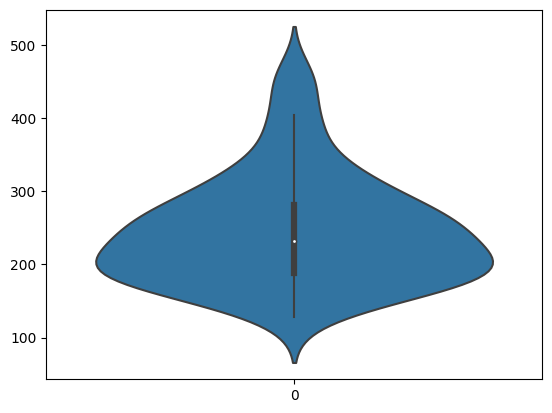

In [48]:
sns.violinplot(df['Mat'])

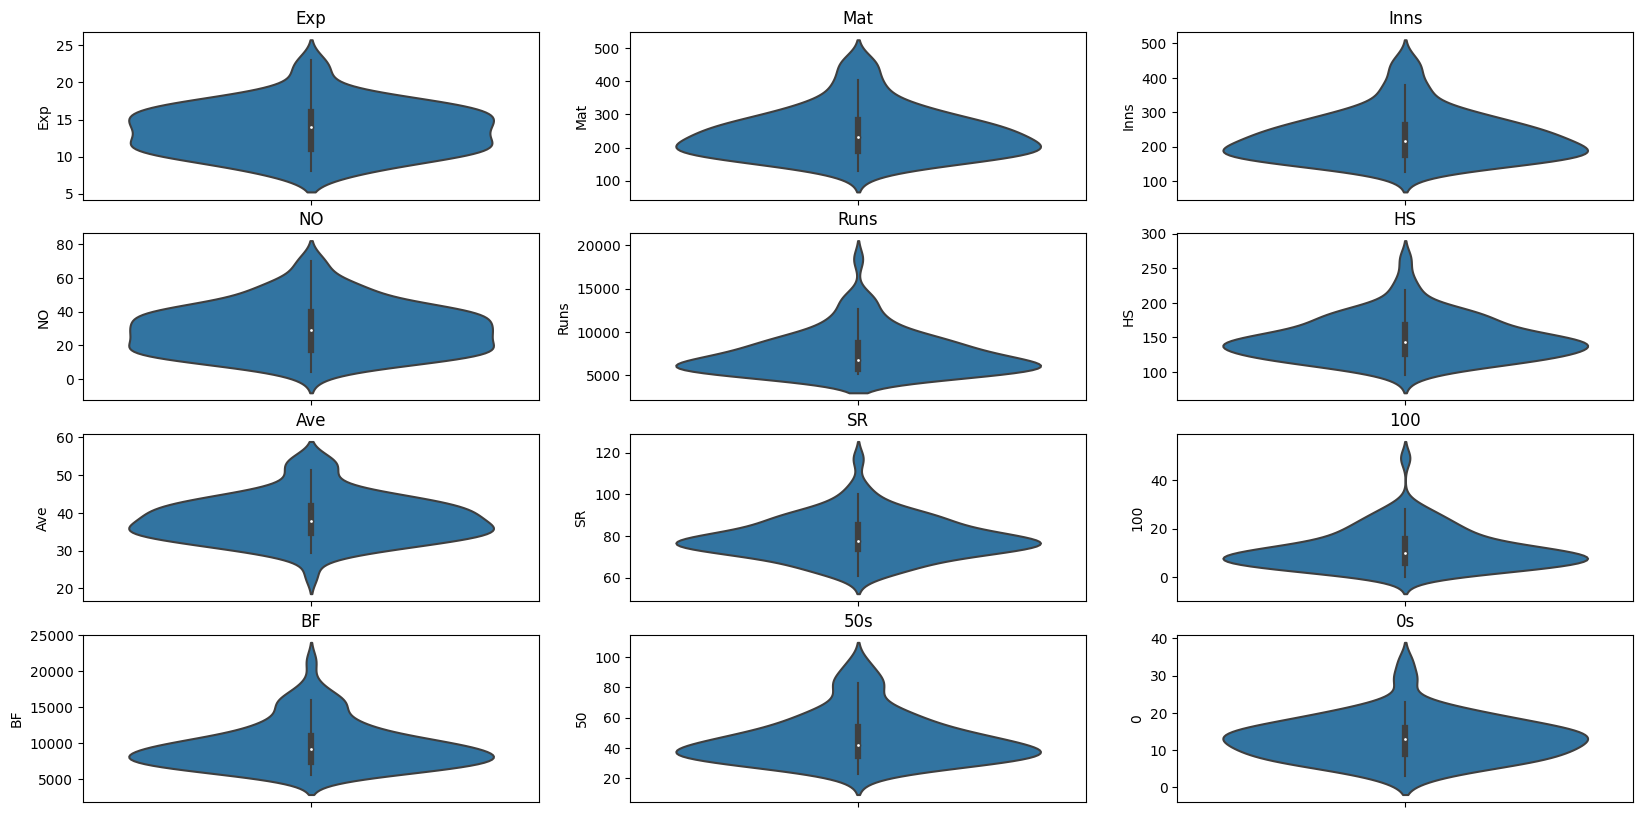

In [49]:
f, axes = plt.subplots(4,3, figsize=(20, 10))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

##Starting K-means
(Feature) Scaling the data

In [52]:
df_drop=df.copy()
player=df_drop.pop('Player')
df_drop

Mat  Inns  NO   Runs   HS    Ave     BF     SR  100  50   0  Exp
0   463   452  41  18426  200  44.83  21367  86.23   49  96  20   23
1   404   380  41  14234  169  41.98  18048  78.86   25  93  15   15
2   375   365  39  13704  164  42.03  17046  80.39   30  82  20   17
3   445   433  18  13430  189  32.36  14725  91.20   28  68  34   22
4   448   418  39  12650  144  33.37  16020  78.96   19  77  28   17
..  ...   ...  ..    ...  ...    ...    ...    ...  ...  ..  ..  ...
74  128   127  13   5134  133  45.03   7908  64.92   11  31   3   16
75  162   149  31   5122   96  43.40   6945  73.75    0  42   6   13
76  197   181  37   5092  120  35.36   6614  76.98    5  26   7   10
77  198   161  33   5088  156  39.75   5504  92.44    6  30  15   11
78  265   228  57   5080  112  29.70   6252  81.25    3  23  14   15

[79 rows x 12 columns]

In [55]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

df_scaled=scaler.fit_transform(df_drop)
pd.DataFrame(df_scaled)

0         1         2         3         4         5         6   \
0   2.955282  3.169333  0.764963  4.262328  1.632443  1.072294  3.681214   
1   2.155179  2.138915  0.764963  2.609117  0.635224  0.587725  2.635385   
2   1.761908  1.924245  0.625397  2.400099  0.474382  0.596226  2.319651   
3   2.711183  2.897417 -0.840046  2.292041  1.278591 -1.047909  1.588295   
4   2.751866  2.682747  0.625397  1.984430 -0.168986 -0.876185  1.996354   
..       ...       ...       ...       ...       ...       ...       ...   
74 -1.587674 -1.481860 -1.188961 -0.979677 -0.522838  1.106299 -0.559768   
75 -1.126598 -1.167010  0.067133 -0.984410 -1.713068  0.829159 -0.863213   
76 -0.651961 -0.709047  0.485831 -0.996241 -0.941027 -0.537836 -0.967512   
77 -0.638400 -0.995274  0.206699 -0.997819  0.217035  0.208570 -1.317278   
78  0.270191 -0.036412  1.881490 -1.000973 -1.198374 -1.500174 -1.081580   

          7         8         9         10        11  
0   0.703152  4.656726  3.050057  1.145837  2.812787  
1  -0.044139  1.671888  2.865418  0.296671  0.380938  
2   0.110997  2.293729  2.188406  1.145837  0.988900  
3   1.207091  2.044992  1.326755  3.523501  2.508806  
4  -0.034000  0.925678  1.880674  2.504502  0.988900  
..       ...       ...       ...       ...       ...  
74 -1.457604 -0.069268 -0.950465 -1.741328  0.684919  
75 -0.562275 -1.437319 -0.273453 -1.231828 -0.227024  
76 -0.234765 -0.815478 -1.258197 -1.061995 -1.138967  
77  1.332823 -0.691110 -1.012011  0.296671 -0.834986  
78  0.198198 -1.064215 -1.442837  0.126837  0.380938  

[79 rows x 12 columns]

In [56]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

Mat      Inns        NO      Runs        HS       Ave        BF  \
0  2.955282  3.169333  0.764963  4.262328  1.632443  1.072294  3.681214   
1  2.155179  2.138915  0.764963  2.609117  0.635224  0.587725  2.635385   
2  1.761908  1.924245  0.625397  2.400099  0.474382  0.596226  2.319651   
3  2.711183  2.897417 -0.840046  2.292041  1.278591 -1.047909  1.588295   
4  2.751866  2.682747  0.625397  1.984430 -0.168986 -0.876185  1.996354   

         SR       100        50         0       Exp  
0  0.703152  4.656726  3.050057  1.145837  2.812787  
1 -0.044139  1.671888  2.865418  0.296671  0.380938  
2  0.110997  2.293729  2.188406  1.145837  0.988900  
3  1.207091  2.044992  1.326755  3.523501  2.508806  
4 -0.034000  0.925678  1.880674  2.504502  0.988900

In [57]:
from sklearn.cluster import KMeans

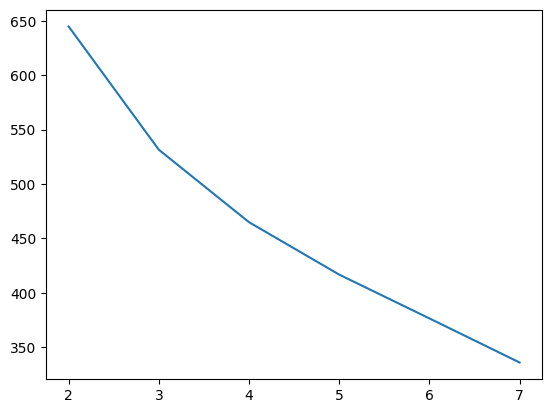

In [59]:
# Elbow curve method to find the ideal number of clusters.
clusters=list(range(2,8))
ssd = []   # WCSS within cluster sum of square
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_) #inertial is the distance between point nad

plt.plot(clusters,ssd);
plt.show()

In [62]:
cluster=KMeans(n_clusters=3,max_iter=150,random_state=15)
cluster.fit(df_df1)

KMeans(max_iter=150, n_clusters=3, random_state=15)

In [63]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int32)

In [65]:
df['Cluster_ID']=cluster.labels_
df.head()

Player  Mat  Inns  NO   Runs   HS    Ave     BF  \
0         SR Tendulkar (INDIA)  463   452  41  18426  200  44.83  21367   
1  KC Sangakkara (Asia/ICC/SL)  404   380  41  14234  169  41.98  18048   
2         RT Ponting (AUS/ICC)  375   365  39  13704  164  42.03  17046   
3      ST Jayasuriya (Asia/SL)  445   433  18  13430  189  32.36  14725   
4   DPMD Jayawardene (Asia/SL)  448   418  39  12650  144  33.37  16020   

      SR  100  50   0  Exp  Cluster_ID  
0  86.23   49  96  20   23           0  
1  78.86   25  93  15   15           0  
2  80.39   30  82  20   17           0  
3  91.20   28  68  34   22           0  
4  78.96   19  77  28   17           0

In [66]:
df.Cluster_ID.value_counts()

1    39
2    31
0     9
Name: Cluster_ID, dtype: int64

In [67]:
x=df_df1.iloc[:,[3,6]].values   #runs and avg
x

array([[ 4.26232808,  3.68121424],
       [ 2.60911662,  2.63538469],
       [ 2.40009894,  2.31965067],
       [ 2.29204075,  1.58829472],
       [ 1.98442984,  1.99635416],
       [ 1.62515607,  1.93081256],
       [ 1.5620564 ,  1.95381514],
       [ 1.47687184,  1.80603146],
       [ 1.28993905,  1.76443775],
       [ 1.09906254,  1.07183957],
       [ 1.05370965,  0.70852488],
       [ 0.82891706,  1.02646463],
       [ 0.78908539,  0.07485112],
       [ 0.74057751,  0.3218925 ],
       [ 0.6940415 ,  0.94044129],
       [ 0.6707735 , -0.12271897],
       [ 0.65697044,  0.55412401],
       [ 0.63212495,  0.36222579],
       [ 0.47555888,  0.39499659],
       [ 0.45741773,  0.85819919],
       [ 0.42705101,  0.07548132],
       [ 0.40614924,  1.26751904],
       [ 0.35921886,  0.9168085 ],
       [ 0.34778204,  0.43123353],
       [ 0.25825938, -0.55315078],
       [ 0.20817401, -0.23079958],
       [ 0.18766662,  0.01151525],
       [ 0.17583543, -0.87991343],
       [ 0.16518736,

In [68]:
y_kmeans=cluster.fit_predict(x)
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

Text(0, 0.5, 'Average')

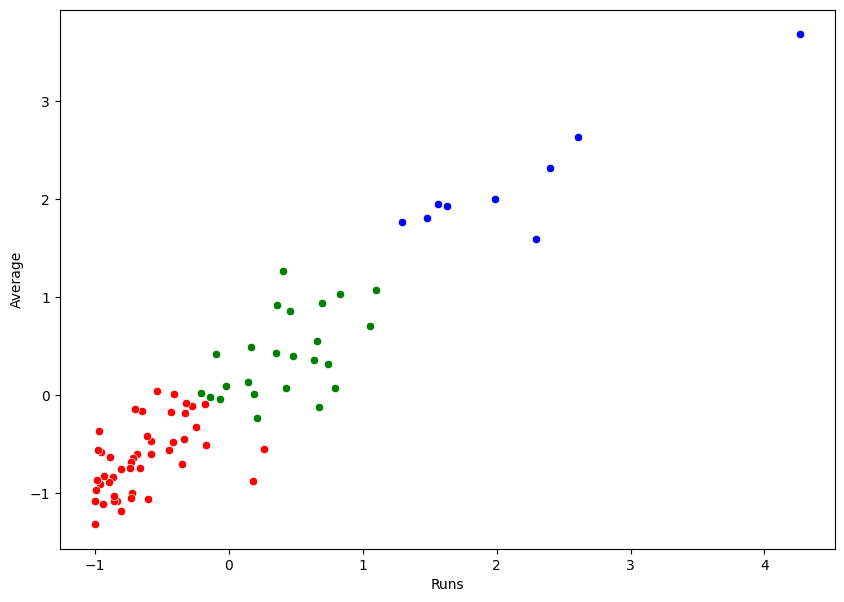

In [76]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=x[y_kmeans==0,0],y=x[y_kmeans==0,1],color='red',data=x)
sns.scatterplot(x=x[y_kmeans==1,0],y=x[y_kmeans==1,1],color='green',data=x)
sns.scatterplot(x=x[y_kmeans==2,0],y=x[y_kmeans==2,1],color='blue',data=x)

plt.xlabel('Runs')
plt.ylabel('Average')